Test if L1 normalizing Largrange Multipliers improve SVM by reducing number of support vector
 
delicate dataset

regularization

In [1]:
import sys
sys.path.append('./custom_qiskit')

import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from scipy.stats import bernoulli

from classification.classifier import SVM
from classification.optimizer import QpDuel
from datageneration import data_generation


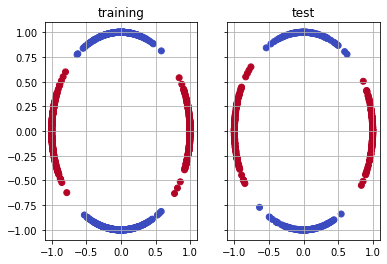

In [2]:
dim = 2
num_train = 2**10
num_test = 2**9
C = None
dist = 1
cent = .05

X1, y1 = data_generation(dim, int(np.ceil(num_train/4)), 1, mean=np.array([dist, 0]), cov=cent*np.eye(dim))
X2, y2 = data_generation(dim, int(np.ceil(num_train/4)), 1, mean=np.array([-dist, 0]), cov=cent*np.eye(dim))
X3, y3 = data_generation(dim, int(np.ceil(num_train/4)), -1, mean=np.array([0, dist]), cov=cent*np.eye(dim))
X4, y4 = data_generation(dim, int(np.ceil(num_train/4)), -1, mean=np.array([0, -dist]), cov=cent*np.eye(dim))

X_train = np.vstack((X1, X2, X3, X4))
X_train = np.array([x/np.linalg.norm(x) for x in X_train])
y_train = np.hstack((y1, y2, y3, y4))

X5, y5 = data_generation(dim, int(np.ceil(num_test/4)), 1, mean=np.array([dist, 0]), cov=cent*np.eye(dim))
X6, y6 = data_generation(dim, int(np.ceil(num_test/4)), 1, mean=np.array([-dist, 0]), cov=cent*np.eye(dim))
X7, y7 = data_generation(dim, int(np.ceil(num_test/4)), -1, mean=np.array([0, dist]), cov=cent*np.eye(dim))
X8, y8 = data_generation(dim, int(np.ceil(num_test/4)), -1, mean=np.array([0, -dist]), cov=cent*np.eye(dim))

X_test = np.vstack((X5, X6, X7, X8))
X_test = np.array([x/np.linalg.norm(x) for x in X_test])
y_test = np.hstack((y5, y6, y7, y8))

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
ax = ax.flatten()
data = [X_train, X_test]
label = [y_train, y_test]
subtitle = ['training','test']
for i in range(len(ax)):
    ax[i].scatter(data[i][:,0], data[i][:,1], c=label[i], cmap=plt.cm.coolwarm)
    ax[i].grid()
    ax[i].set_title(subtitle[i])

In [4]:
import io
from contextlib import redirect_stdout

hyperparameters = 10**np.linspace(-3, 3, 1000)
trap = io.StringIO()
testerrs = []
testerrs_n = []
for C in 1/hyperparameters:
    cls_pw2 = SVM(X_train, y_train, kernel= 'power2', name='power2 kernel')
    cls_pw2_n = SVM(X_train, y_train, kernel= 'power2', name='power2 kernel (normalized)')
    with redirect_stdout(trap):
        cls_pw2.optimize(QpDuel, C=C, Probability=False)
        cls_pw2_n.optimize(QpDuel, C=C, Probability=True)
    clses = [cls_pw2, cls_pw2_n]
    test_label = [y_test, y_test]
    for i in range(len(clses)):
        print('Performance of', clses[i].name, 'is', clses[i].check_perfomance(X_test, test_label[i]))
    testerrs.append(cls_pw2.testerr)
    testerrs_n.append(cls_pw2_n.testerr)


Performance of power2 kernel is 1.0
Performance of power2 kernel (normalized) is 1.0
Performance of power2 kernel is 1.0
Performance of power2 kernel (normalized) is 1.0
Performance of power2 kernel is 1.0
Performance of power2 kernel (normalized) is 1.0
Performance of power2 kernel is 1.0
Performance of power2 kernel (normalized) is 1.0
Performance of power2 kernel is 1.0
Performance of power2 kernel (normalized) is 1.0
Performance of power2 kernel is 1.0
Performance of power2 kernel (normalized) is 1.0
Performance of power2 kernel is 1.0
Performance of power2 kernel (normalized) is 1.0
Performance of power2 kernel is 1.0
Performance of power2 kernel (normalized) is 1.0
Performance of power2 kernel is 1.0
Performance of power2 kernel (normalized) is 1.0
Performance of power2 kernel is 1.0
Performance of power2 kernel (normalized) is 1.0
Performance of power2 kernel is 1.0
Performance of power2 kernel (normalized) is 1.0
Performance of power2 kernel is 1.0
Performance of power2 kernel 

clses = [cls_pw2, cls_pw2_n]
test_label = [y_test, y_test]
for i in range(len(clses)):
    print('Performance of', clses[i].name, 'is', clses[i].check_perfomance(X_test, test_label[i]))

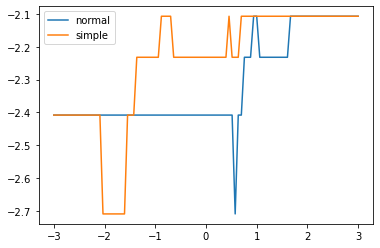

In [10]:
plt.plot(np.log10(hyperparameters), np.log10(testerrs_n), label='normal')
plt.plot(np.log10(hyperparameters), np.log10(testerrs), label='simple')
plt.legend()

In [6]:
hyperparameters

array([1.00000000e-03, 1.14975700e-03, 1.32194115e-03, 1.51991108e-03,
       1.74752840e-03, 2.00923300e-03, 2.31012970e-03, 2.65608778e-03,
       3.05385551e-03, 3.51119173e-03, 4.03701726e-03, 4.64158883e-03,
       5.33669923e-03, 6.13590727e-03, 7.05480231e-03, 8.11130831e-03,
       9.32603347e-03, 1.07226722e-02, 1.23284674e-02, 1.41747416e-02,
       1.62975083e-02, 1.87381742e-02, 2.15443469e-02, 2.47707636e-02,
       2.84803587e-02, 3.27454916e-02, 3.76493581e-02, 4.32876128e-02,
       4.97702356e-02, 5.72236766e-02, 6.57933225e-02, 7.56463328e-02,
       8.69749003e-02, 1.00000000e-01, 1.14975700e-01, 1.32194115e-01,
       1.51991108e-01, 1.74752840e-01, 2.00923300e-01, 2.31012970e-01,
       2.65608778e-01, 3.05385551e-01, 3.51119173e-01, 4.03701726e-01,
       4.64158883e-01, 5.33669923e-01, 6.13590727e-01, 7.05480231e-01,
       8.11130831e-01, 9.32603347e-01, 1.07226722e+00, 1.23284674e+00,
       1.41747416e+00, 1.62975083e+00, 1.87381742e+00, 2.15443469e+00,
      